In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### This is to display all the columns & avoid warning while updating the copied dataframe

In [2]:
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

#### Loading the csv into dataframe & used low_memory=False for the memory warning.

In [3]:
loan_df = pd.read_csv("loan.csv", low_memory=False)
loan_df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Checking Shape & Column information

In [4]:
print(loan_df.shape) # (39717, 111)
print(loan_df.info(verbose = True))

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17

## 1. <u>Data Understanding & finding relevant columns </u>


##### - Removing columns that are Not applicable, having same values in all rows
##### - Removing null values columns having null more than threshold.
##### - *For this exercise we are taking the threshold as 35% 

In [5]:
# function to find the null columns having a threshold.
def findNonNullColumns(loan_df, fraction):
    return loan_df[loan_df.columns[loan_df.isnull().sum() < fraction * len(loan_df)]].columns

In [6]:
print(findNonNullColumns(loan_df, 0.35))

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


#### Keeping the above columns & removing other from the dataframe

In [7]:
loan_df_first = loan_df[findNonNullColumns(loan_df, 0.35)]

In [8]:
loan_df_first.shape

(39717, 54)

#### After analysing the data dictionary & data removing columns with only one type of value, primary key columns(id/memberid) & non-relevant columns(url/title)
#### Keeping these columns for further analysis- 
#### 'loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment',
#### 'grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc','verification_status','loan_status',
#### 'purpose','zip_code','addr_state','dti','pub_rec_bankruptcies','term','issue_d','loan_status'

In [9]:
loan_df_clean = loan_df_first[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc','verification_status','loan_status','purpose','zip_code','addr_state','dti','pub_rec_bankruptcies','issue_d']]

In [10]:
loan_df_clean.shape #(39717, 20)

(39717, 20)

#### drop duplicate rows

In [11]:
loan_df_clean.drop_duplicates(inplace = True)

In [12]:
loan_df_clean.shape #(39717, 20) hence no duplicate

(39717, 20)

In [13]:
loan_df_clean.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_d
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,860xx,AZ,27.65,0.0,Dec-11
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0.0,Dec-11


## 2. <u>Data Cleanup & manipulation </u>

##### - Remove unnecessary rows like - Loan Status as type 'Current'.
##### - Manipulate date, string fields to be applicable for the analysis
##### - Fix missing values


In [14]:
loan_df_clean['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [15]:
# To analyse this data only 'Fully Paid' & 'Charged Off' need to be consider as for 'Current' we can't make any prediction.
loan_df_second = loan_df_clean[loan_df_clean['loan_status'] != 'Current']
loan_df_second.shape

(38577, 20)

In [16]:
# updating term to remove month from suffix 
loan_df_second['term'] = loan_df_second['term'].str.rstrip(' months').astype('int')

In [17]:
loan_df_second['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [18]:
#split the issue date to get the month of loan
loan_df_second['issue_d'] = pd.to_datetime(loan_df_second['issue_d'], format='%b-%y')
loan_df_second['issue_month'] = loan_df_second['issue_d'].dt.month

In [19]:
#remove % from interest rate & convert it to round number
loan_df_second['int_rate'] = loan_df_second['int_rate'].str.rstrip('%').astype('float')
loan_df_second['int_rate'] = loan_df_second['int_rate'].round().astype('int')

In [20]:
loan_df_second['loan_status_num'] = loan_df_second['loan_status'].map({'Charged Off':1, 'Fully Paid':0})

In [21]:
loan_df_second.shape

(38577, 22)

#### checking the missing values & filling them with relevant data.

In [22]:
loan_df_second.isnull().sum().sort_values(ascending = False)

emp_title               2386
emp_length              1033
pub_rec_bankruptcies     697
loan_amnt                  0
verification_status        0
issue_month                0
issue_d                    0
dti                        0
addr_state                 0
zip_code                   0
purpose                    0
loan_status                0
annual_inc                 0
funded_amnt                0
home_ownership             0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt_inv            0
loan_status_num            0
dtype: int64

In [23]:
# To fill the blank values for title we can assume that they do some small business & their emp length is hard to analyse so we can take the mode

loan_df_second.fillna({'emp_title': 'Self Business'}, inplace = True)

In [24]:
loan_df_second['emp_length'] = loan_df_second['emp_length'].fillna(loan_df_second['emp_length'].mode()[0])

In [25]:
# for pub_rec_bankruptcies we can assume none of then is bankrupt in public.
loan_df_second['pub_rec_bankruptcies'] = loan_df_second['pub_rec_bankruptcies'].fillna(0.0)

In [26]:
loan_df_second.isnull().sum().sort_values(ascending = False)

loan_amnt               0
funded_amnt             0
issue_month             0
issue_d                 0
pub_rec_bankruptcies    0
dti                     0
addr_state              0
zip_code                0
purpose                 0
loan_status             0
verification_status     0
annual_inc              0
home_ownership          0
emp_length              0
emp_title               0
sub_grade               0
grade                   0
installment             0
int_rate                0
term                    0
funded_amnt_inv         0
loan_status_num         0
dtype: int64

### 2.1 <u> Outliers cleanup </u>

In [27]:
# Created function to create box plot

def createBoxPlot(loan_df, parameter):
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(loan_df, y = parameter)
    ax.set(title = "Box plot analysis on- " +  parameter.replace("_", " ").title())
    ax.set_ylabel(parameter.replace("_", " ").title())
    #ax.set_ylabel('Application Count')
    plt.show();


count    38577.00000
mean        11.92327
std          3.68394
min          5.00000
25%          9.00000
50%         12.00000
75%         14.00000
max         24.00000
Name: int_rate, dtype: float64


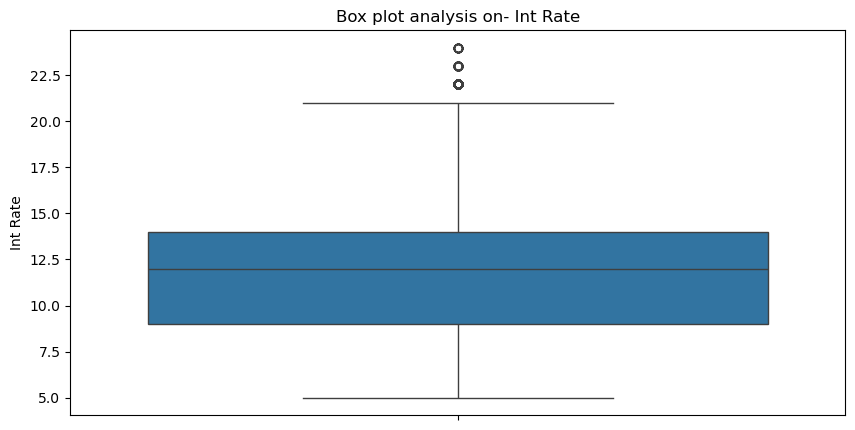

In [28]:
print(loan_df_second.int_rate.describe())
createBoxPlot(loan_df_second, 'int_rate')

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


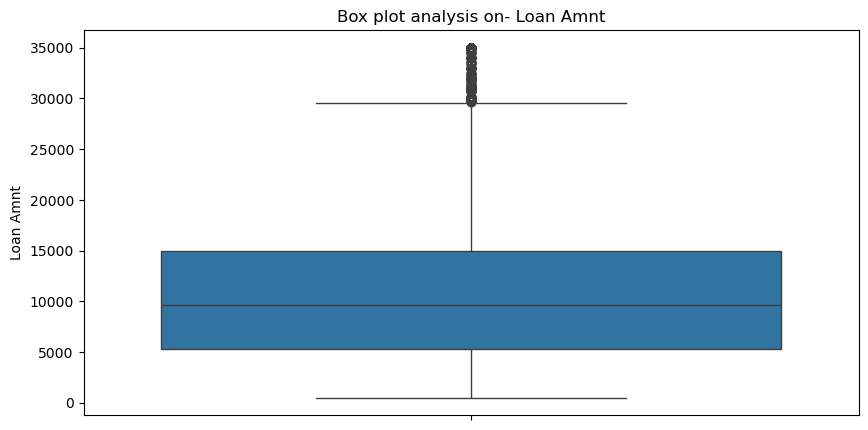

In [29]:
print(loan_df_second.loan_amnt.describe())
createBoxPlot(loan_df_second, 'loan_amnt')

#### Distribution seems wise for both loan amount & interest rate, hence no change here

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


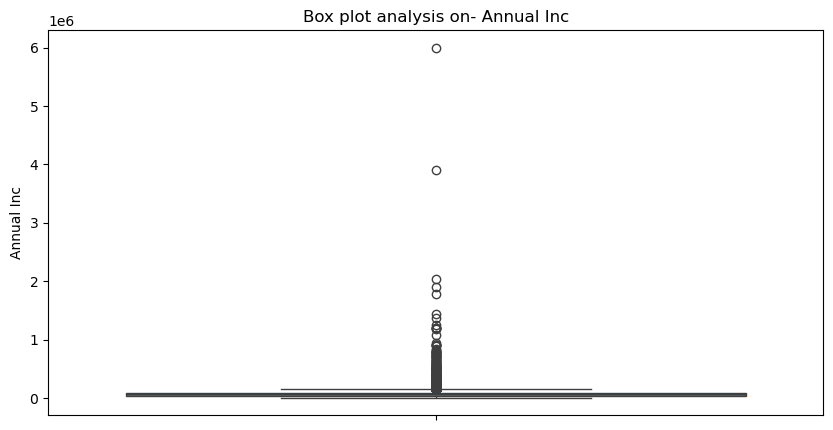

In [30]:
print(loan_df_second.annual_inc.describe())
createBoxPlot(loan_df_second, 'annual_inc')

#### This column has outliers hence we have to consider the values only till 95 percentile as at 99 the value is high.

In [31]:
loan_df_second.annual_inc.quantile([0.5, 0.75,0.85, 0.95,0.99])

0.50     58868.0
0.75     82000.0
0.85    100000.0
0.95    140004.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [32]:
loan_df_final = loan_df_second[loan_df_second.annual_inc < loan_df_second.annual_inc.quantile(0.95)]

count     36642.000000
mean      60829.831120
std       27717.831464
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77704.050000
max      140000.000000
Name: annual_inc, dtype: float64


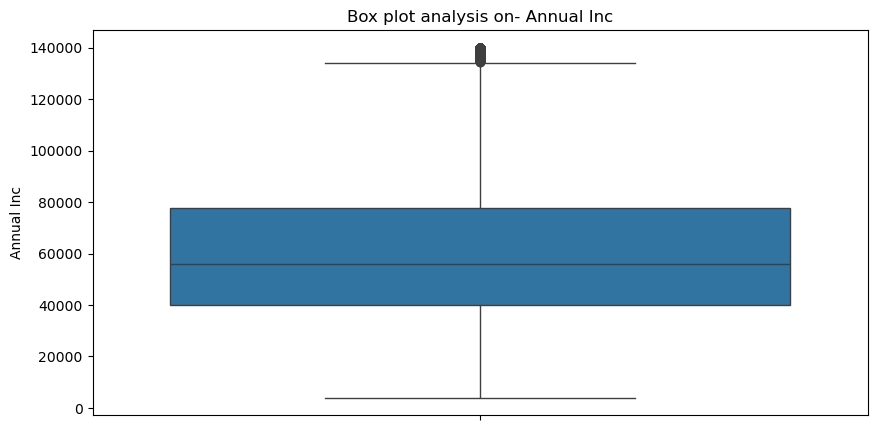

In [33]:
print(loan_df_final.annual_inc.describe())
createBoxPlot(loan_df_final, 'annual_inc')

#### Value seems good now.

### 2.2 Creating Bins for doing further analysis

In [34]:
loan_df_final['loan_amnt_cat'] = pd.cut(loan_df_final['loan_amnt'], [0,8000,16000, 24000, 32000], labels=['0-8k','8k-16k','16k-24k', '24k+']) 
loan_df_final['int_rate_cat'] = pd.cut(loan_df_final['int_rate'], [0,10,12.5, 15, 20], labels=['0-10 %','10-12.5 %','12.5-15 %', '15+ %']) 
loan_df_final['dti_cat'] = pd.cut(loan_df_final['dti'], [0,5,10,15,20,25], labels=['0-5','5-10','10-15', '15-20', '20+']) 


In [35]:
loan_df_final.head(3)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_d,issue_month,loan_status_num,loan_amnt_cat,int_rate_cat,dti_cat
0,5000,5000,4975.0,36,11,162.87,B,B2,Self Business,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,860xx,AZ,27.65,0.0,2011-12-01,12,0,0-8k,10-12.5 %,NaN
1,2500,2500,2500.0,60,15,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0.0,2011-12-01,12,1,0-8k,12.5-15 %,0-5
2,2400,2400,2400.0,36,16,84.33,C,C5,Self Business,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,606xx,IL,8.72,0.0,2011-12-01,12,0,0-8k,15+ %,5-10


## 3. <u> Data Analysis </u>
##### - Analyze the data through charts using Univariate, bivariate & correlation

### 3.1 Univariate Analysis

In [36]:
#function to create Count plot for univariate analysis
def createCountPlot(loan_df, parameter, label_rotation=False, show_per=True):
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=parameter, data=loan_df, hue=parameter, palette='rainbow', legend=False)
    ax.set(title="Univariate analysis on- " + parameter.replace("_", " ").title())
    ax.set_xlabel(parameter.replace("_", " ").title())
    ax.set_ylabel('Applicant Count')
    
    if show_per:
        # Calculate total
        total = len(loan_df[parameter])
        # Add percentage labels
        for p in ax.patches:
            height = p.get_height()
            percentage = f'{(height / total) * 100:.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom')
    
    if label_rotation:
        plt.xticks(rotation=90)
    
    plt.show();

### 1. Loan Status

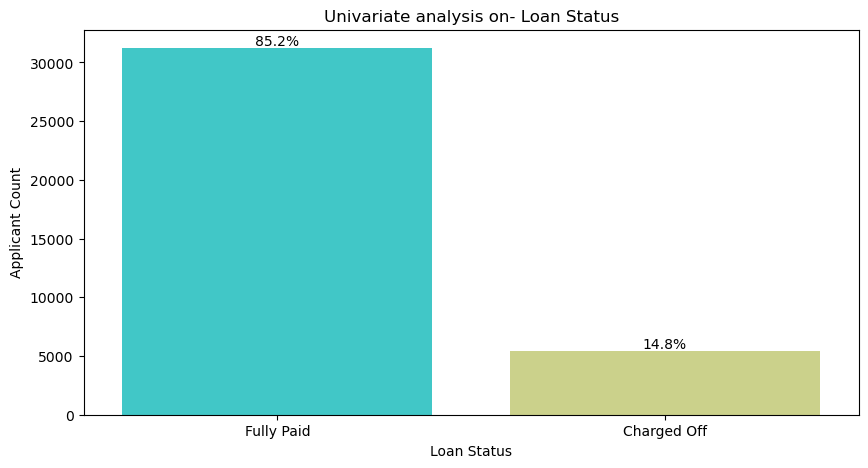

In [37]:
createCountPlot(loan_df_final, 'loan_status')

#### Above analysis states that ~15% of loans got charged off.

### 2. Home ownership

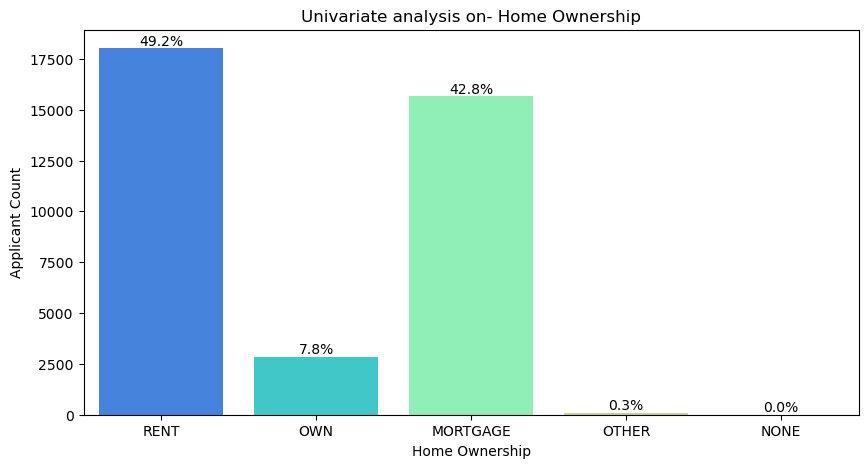

In [38]:
createCountPlot(loan_df_final, 'home_ownership')

#### Above analysis states that most of the applicants live in rented or mortgage.

### 3. Purpose

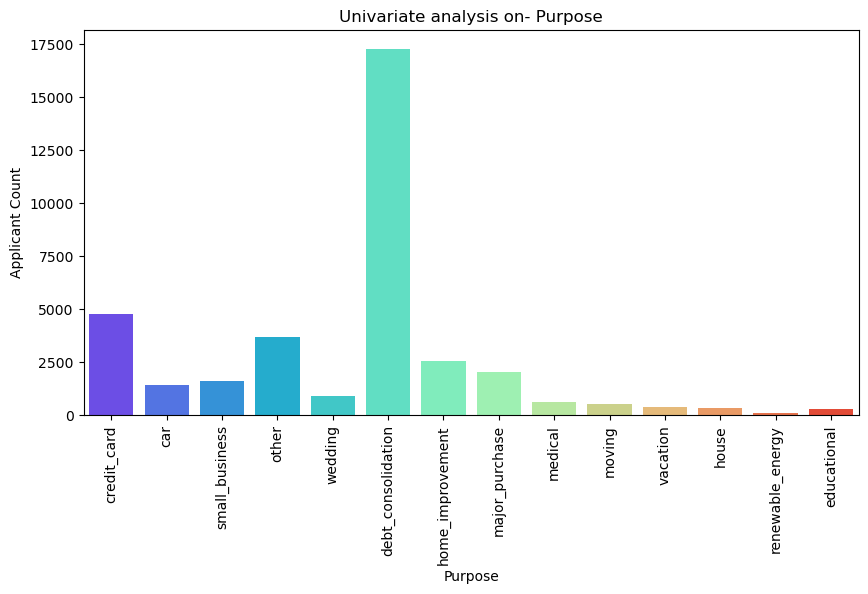

In [39]:
createCountPlot(loan_df_final, 'purpose',label_rotation=True, show_per=False)

#### Above analysis states that most of the loans are for debt consolidation

### 4. Term

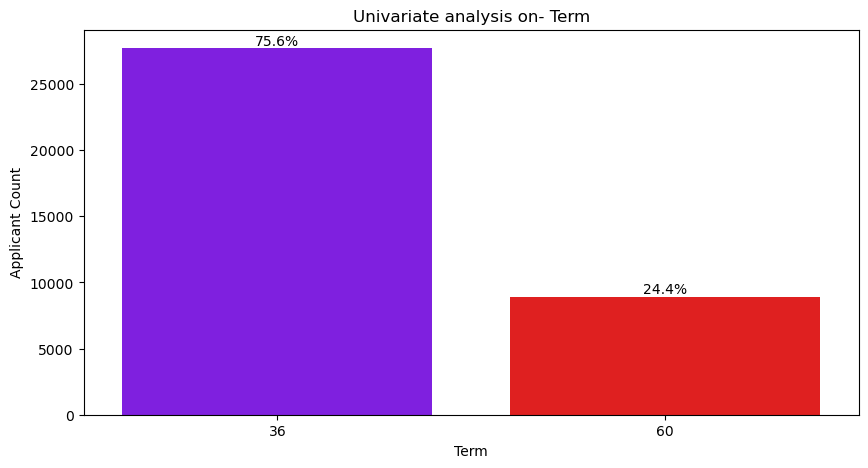

In [40]:
createCountPlot(loan_df_final, 'term')

#### Above analysis states that most of the loan were taken for 36 month duration.

### 5. Issue Month

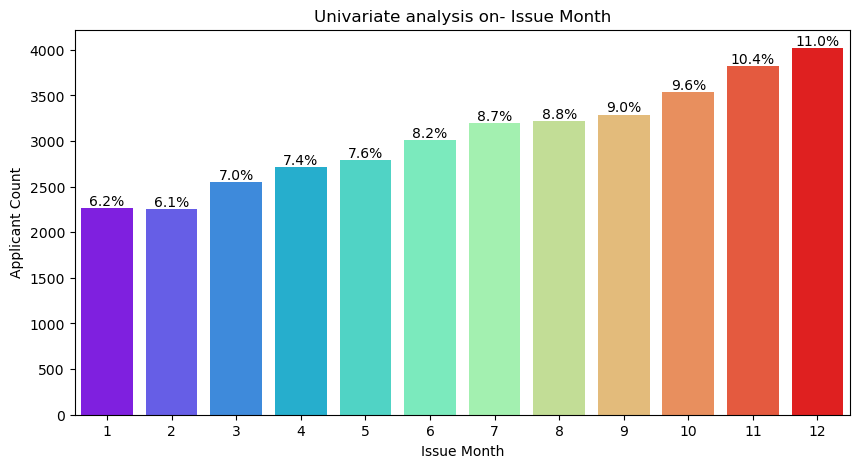

In [41]:
createCountPlot(loan_df_final, 'issue_month')

#### Above analysis states that most of the loans were taken during Holidays season.

### 6. Address State

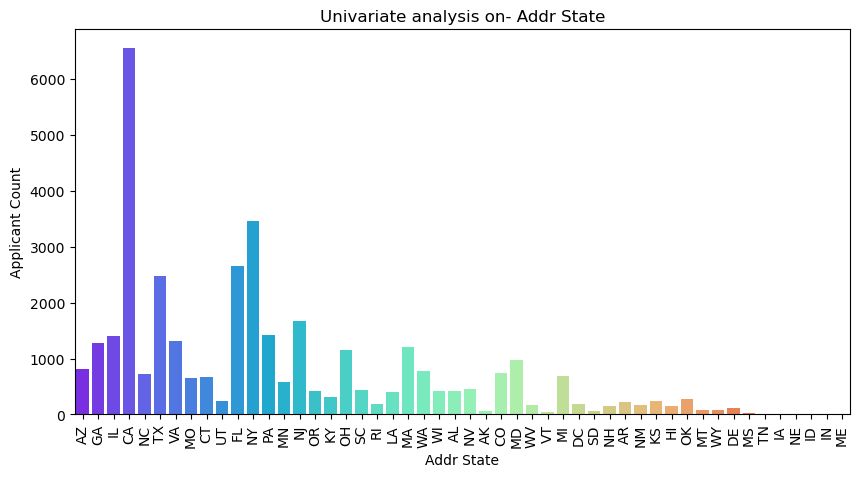

In [42]:
createCountPlot(loan_df_final, 'addr_state', label_rotation=True, show_per=False)

#### Top states taking loans are CA, NY, FL, TX due to high living standards & requirements.

### 7. Grade

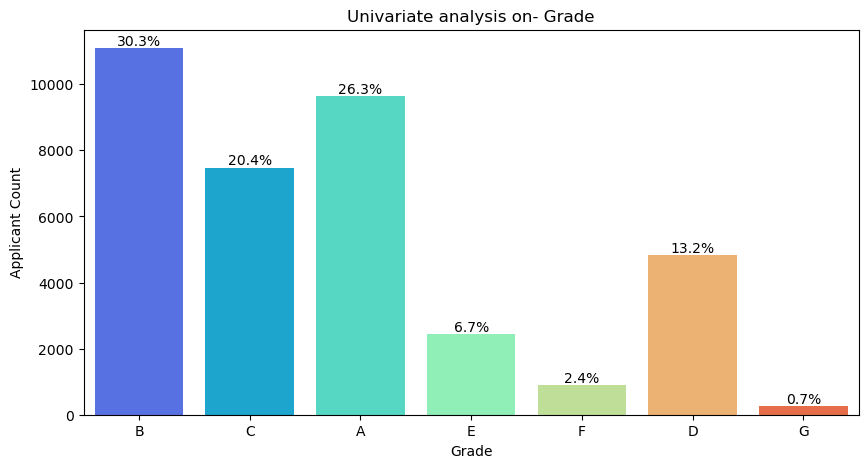

In [43]:
createCountPlot(loan_df_final, 'grade')

#### grade A B C took the highest loan among all grades.

### 8. Verification Status

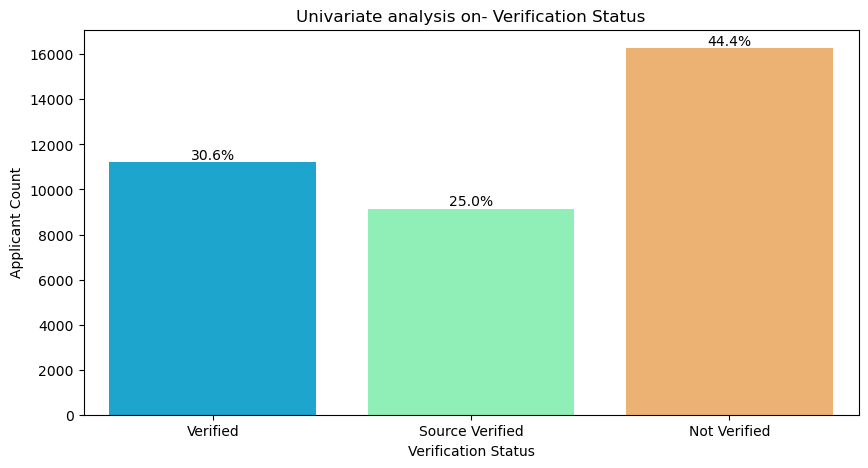

In [44]:
createCountPlot(loan_df_final, 'verification_status')

#### Above analysis states that most of the applicants are not verified, which is not good.

### 9. Box plot for interest Rate, Annual Income & loan Amount

#### Univariate analysis on amount Salary, interest rates, loan amount

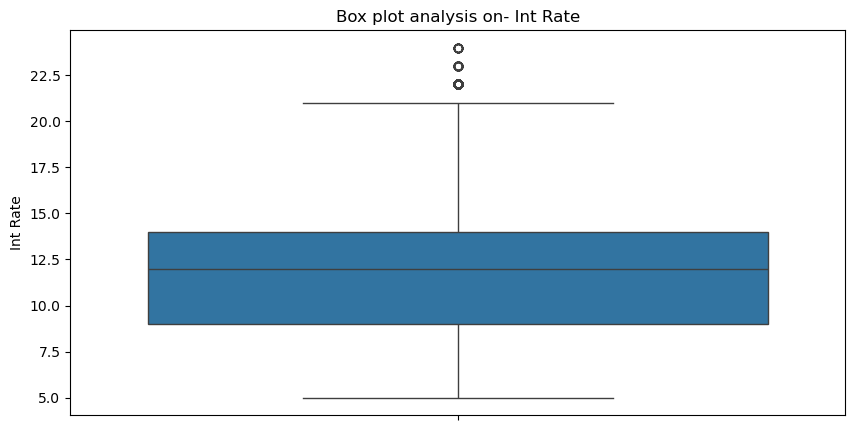

In [45]:
createBoxPlot(loan_df_final, 'int_rate')

#### Interest rate vary b/w 9-13%

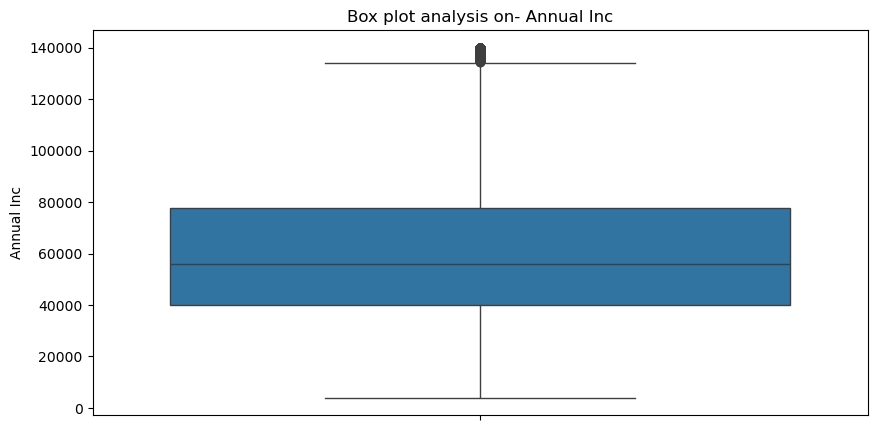

In [46]:
createBoxPlot(loan_df_final, 'annual_inc')

#### Annual Salary lies b/w 40000-75000 USD

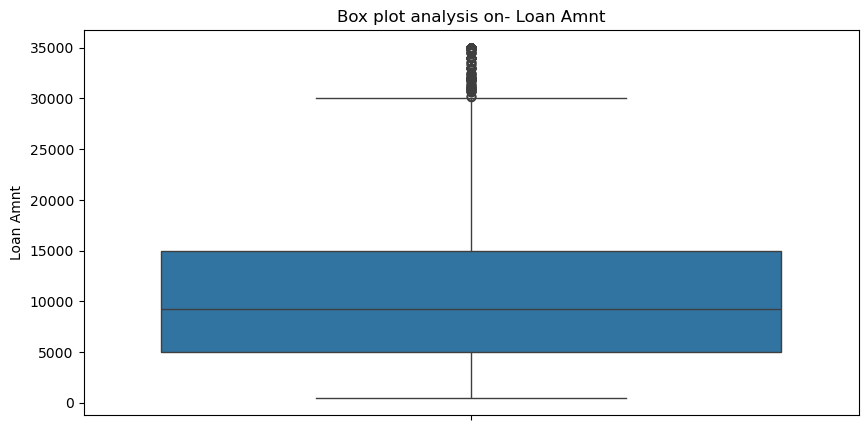

In [47]:
createBoxPlot(loan_df_final, 'loan_amnt')

#### Loan amount varies b/w 5000 to 15000 USD

### 3.2 Correlation
#### Doing Correlation on the numeric values to get a high-level relationship b/w fields

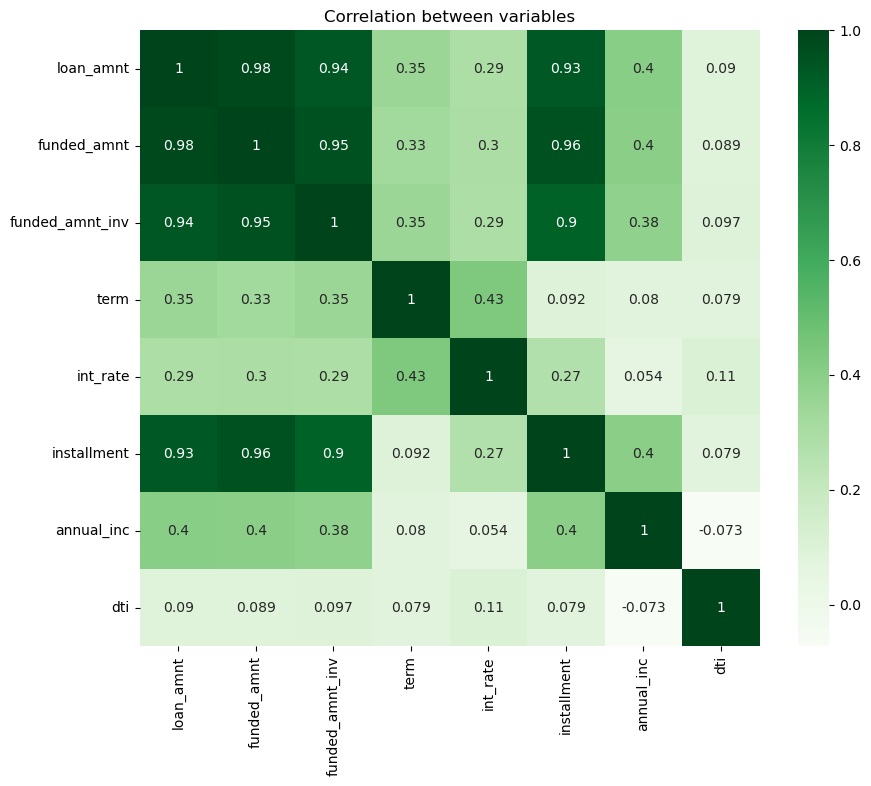

In [48]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(loan_df_final[['loan_amnt','funded_amnt', 'funded_amnt_inv','term','int_rate','installment','annual_inc', 'dti']].corr(),cmap='Greens', annot=True)
plt.title("Correlation between variables")
plt.show()

### Observations:
#### loan amount, funded amount & funded amount inv have high correlation
#### installment & loan amount are positive correlation
#### annual income & dti are slightly negative correlation.
#### Positive correlation b/w annual income & funded amount means person with good annual income get more loan. 

### 3.3 Bivariate Analysis 

#### Loan status Charged off vs other columns


In [49]:
#Function to do Bivariate analysis on loan status = Charged off.
def createBivariantePlot(df_data,feature,label_rotation=False, show_per=True):
    plt.figure(figsize=(10,8))
    sns.set(font_scale=1)

    # Calculate the percentage of loan_status_new =1 per category value
    cat_perc = df_data[[feature, 'loan_status_num']].groupby([feature], as_index=False, observed=True).mean()
    cat_perc.sort_values(by='loan_status_num', ascending=False, inplace=True)
    s = sns.barplot(x = feature, y='loan_status_num', data=cat_perc, hue=feature, palette='rainbow', legend=False)
    
    if show_per:
        # Calculate total
        total = sum(cat_perc['loan_status_num'])
        # Add percentage labels
        for p in s.patches:
            height = p.get_height()
            percentage = f'{(height / total) * 100:.1f}%'
            s.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom')
    
    s.set(title= feature.replace("_"," ").title()+' Vs. Charged off %')
    plt.ylabel('Charged off %')
    plt.xlabel(feature.replace("_"," ").title())
    #plt.tick_params(axis='both', which='major')
    #plt.subplots_adjust(wspace=0.2, top=0.9)
    
    if(label_rotation):
        plt.xticks(rotation=90)
    plt.show();

In [50]:
#Checking all the columns on which we can do bivariate analysis 
loan_df_final.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'issue_d', 'issue_month', 'loan_status_num', 'loan_amnt_cat',
       'int_rate_cat', 'dti_cat'],
      dtype='object')

### 1. Loan Amount

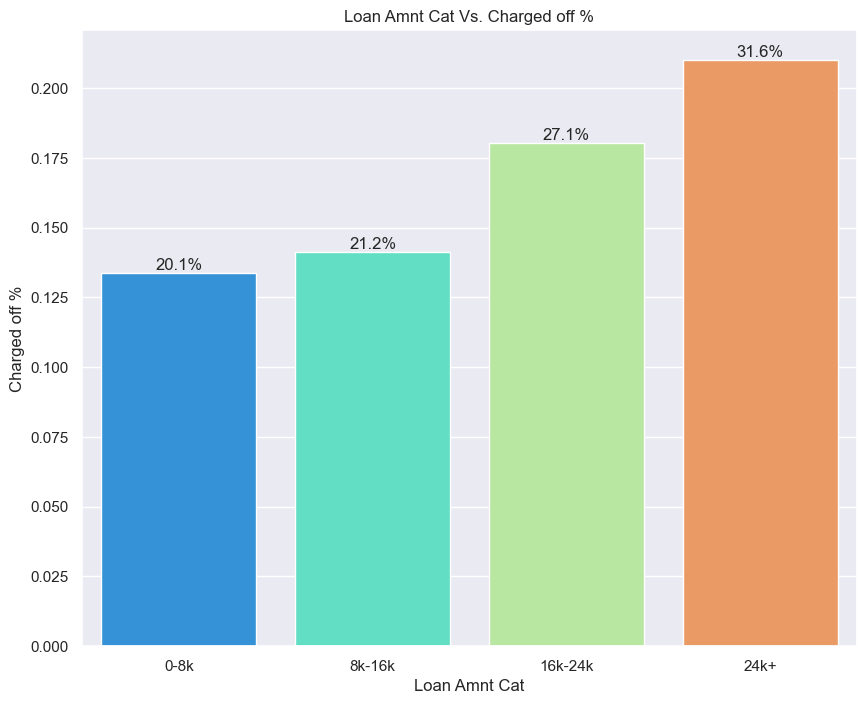

In [51]:
createBivariantePlot(loan_df_final, 'loan_amnt_cat')

#### Above stats states that more the loan amount higer the chances of default, suggestion is to keep the loam amount less than 24K USD

### 2. Term

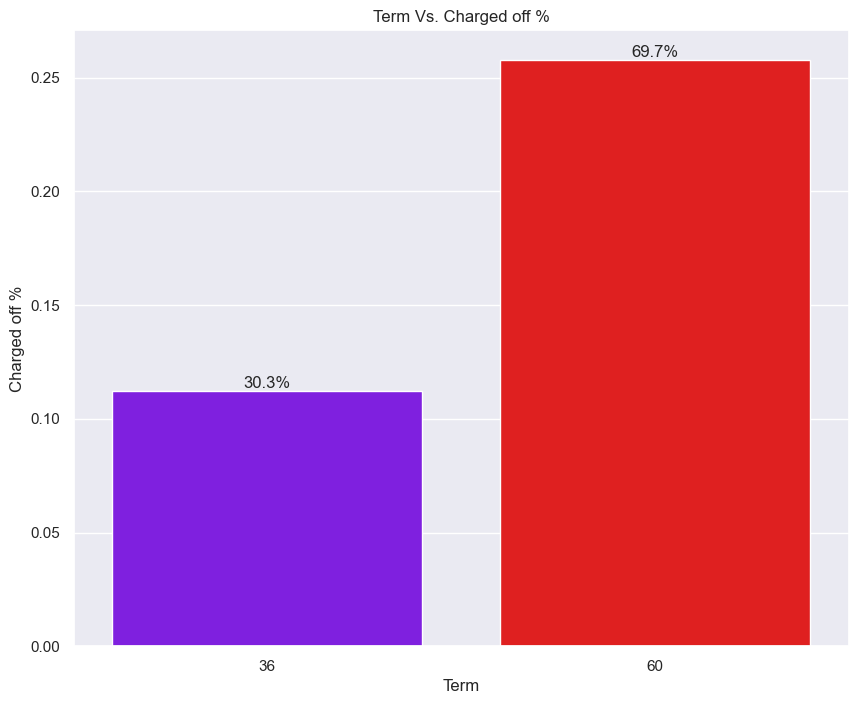

In [52]:
createBivariantePlot(loan_df_final, 'term')

#### Above stats states that with high tenure the chances of default is high.

### 3. Interest Rate

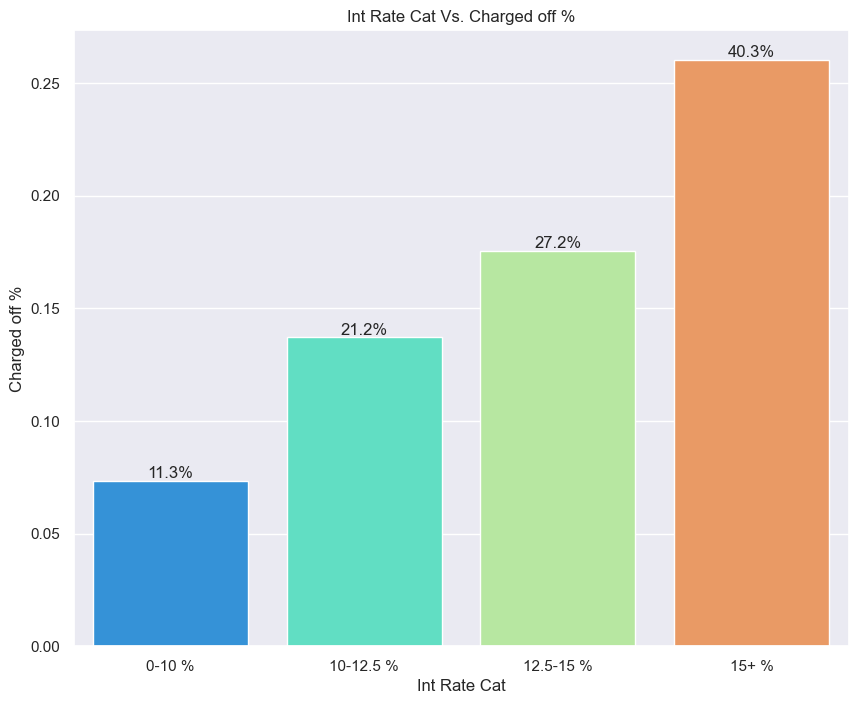

In [53]:
createBivariantePlot(loan_df_final, 'int_rate_cat')

#### Above stats states that higher the interest rate, higher the change of default.

### 4. Grade

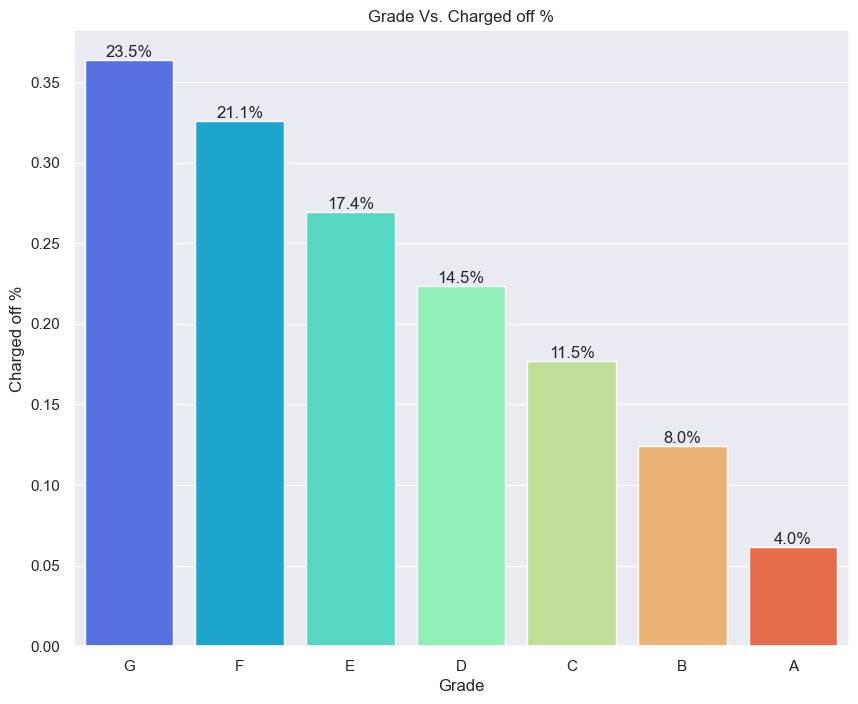

In [54]:
createBivariantePlot(loan_df_final, 'grade')

#### Above stats states that  grade A, B, C have higer chances to returning the loan.

### 5. Sub Grade

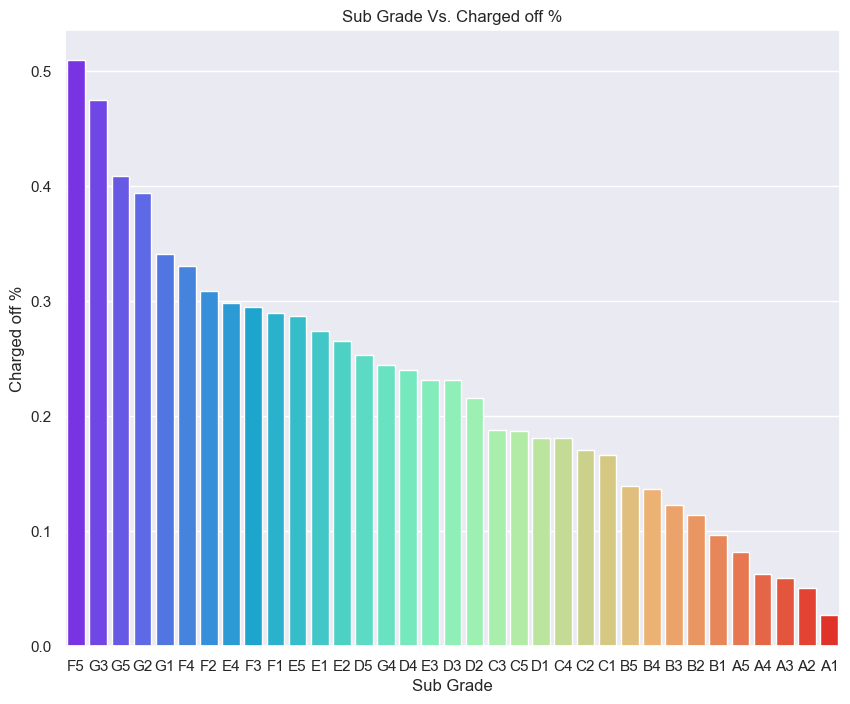

In [55]:
createBivariantePlot(loan_df_final, 'sub_grade', False, False)

#### Above stats states that even with lower grade, F5, G3 & G5 have higher chances of default.

### 6. Emp Length

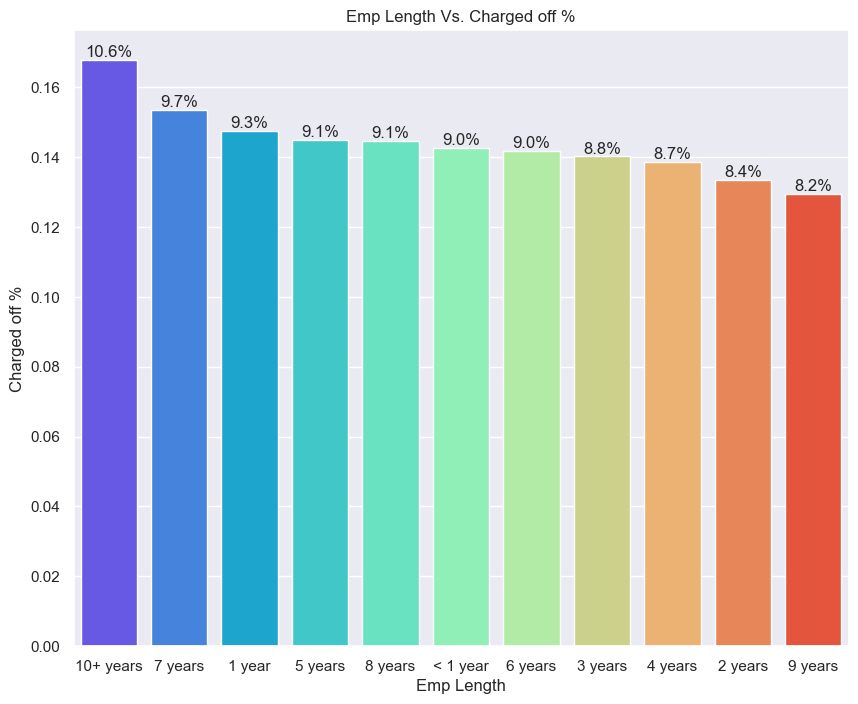

In [56]:
createBivariantePlot(loan_df_final, 'emp_length')

#### Above stats states that employee with more than 10 years of exp have high chance of default due to other commitments

### 7. Home Ownership

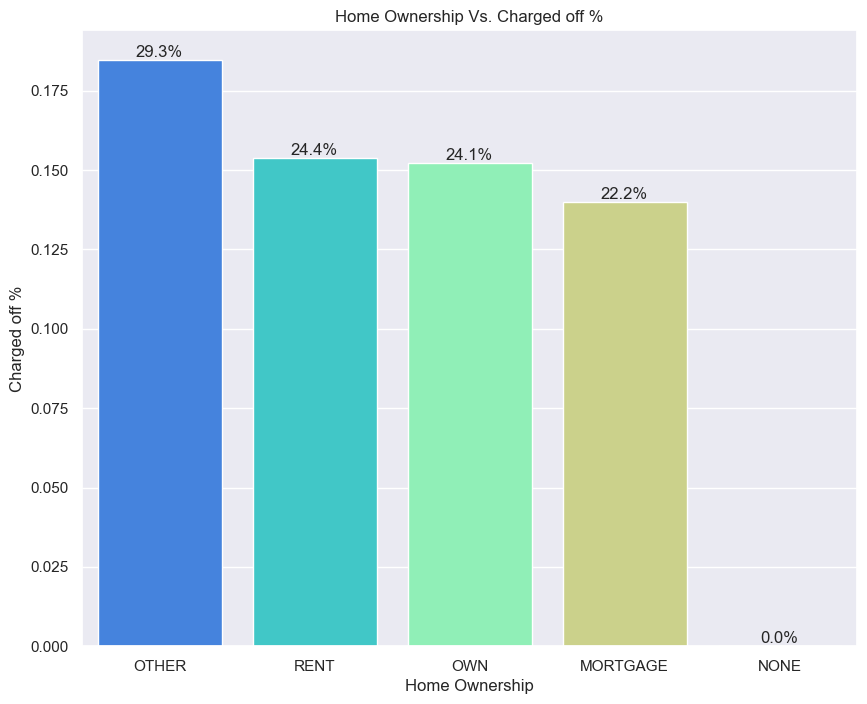

In [57]:
createBivariantePlot(loan_df_final, 'home_ownership')

#### Above stats states that Home owner - Own/Morgage have higer chance of returning the loan as they don't have to pay the rent.

### 8. Verification Status

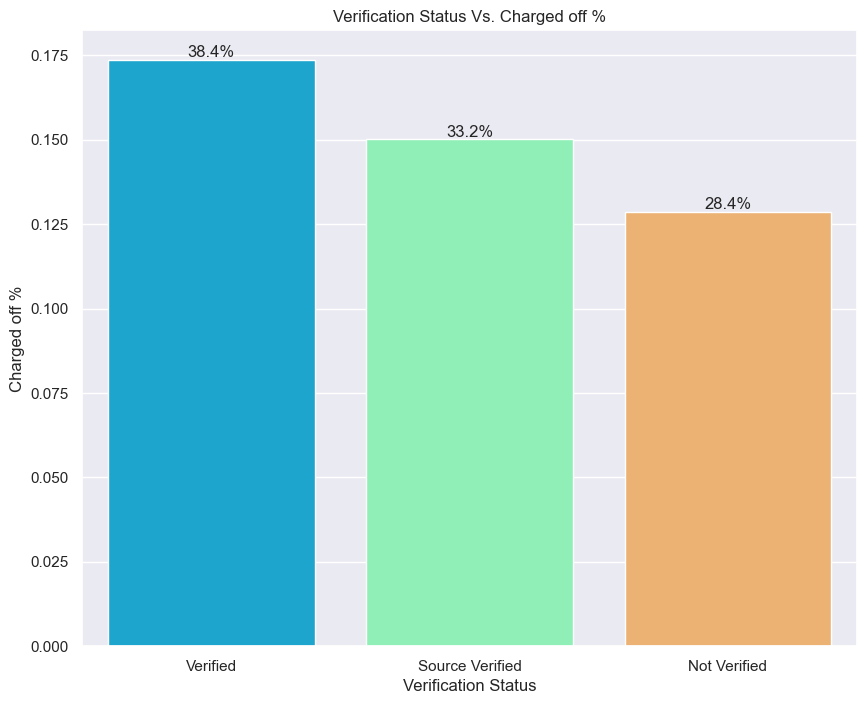

In [58]:
createBivariantePlot(loan_df_final, 'verification_status')

#### Above stats states that verified user are getting default, could be verification is not done correctly

### 9. Purpose

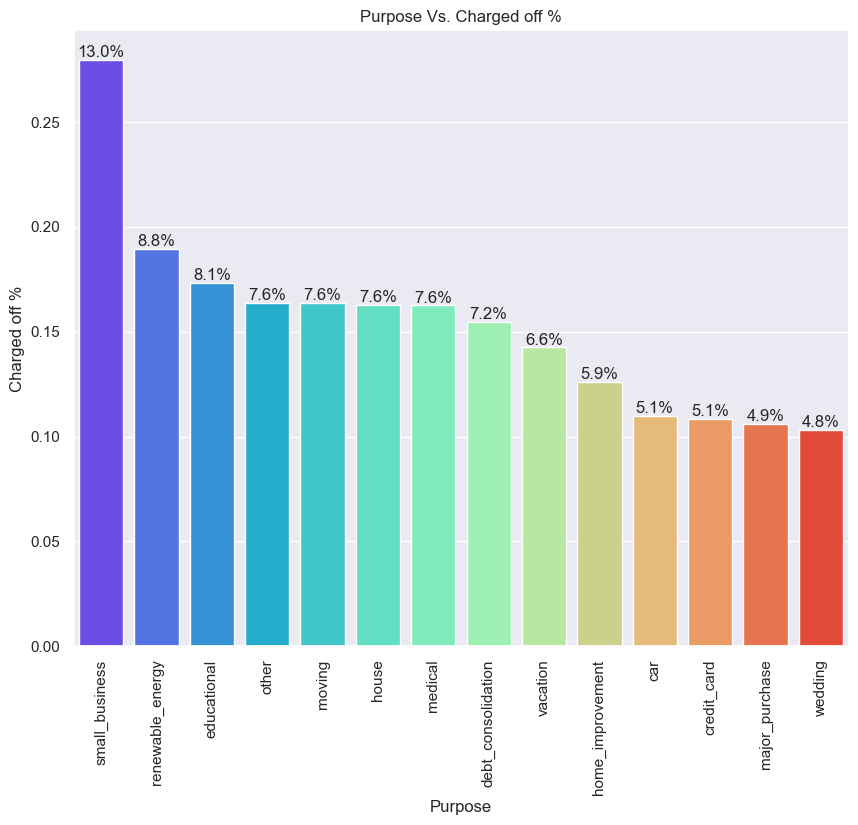

In [59]:
createBivariantePlot(loan_df_final, 'purpose', True)

#### Above stats states that small businesss owner & renewable energy employee are unable to pay loan on time.

### 10. Address State

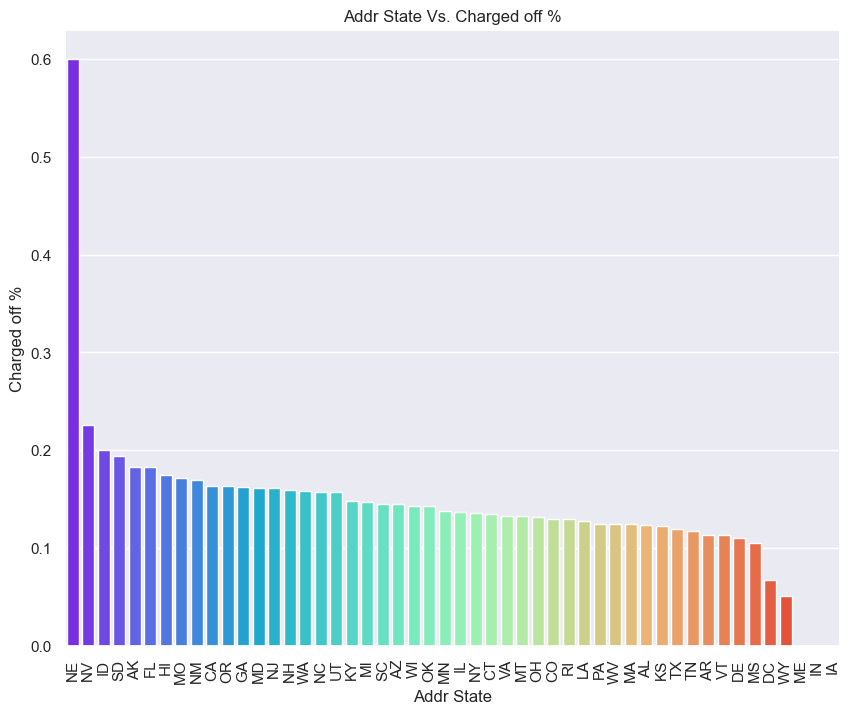

In [60]:
createBivariantePlot(loan_df_final, 'addr_state',True,False)

#### Above stats states that NE, NV , ID states have higher chances of getting default, so we should validate the loan processes in those states.

### 11. DTI

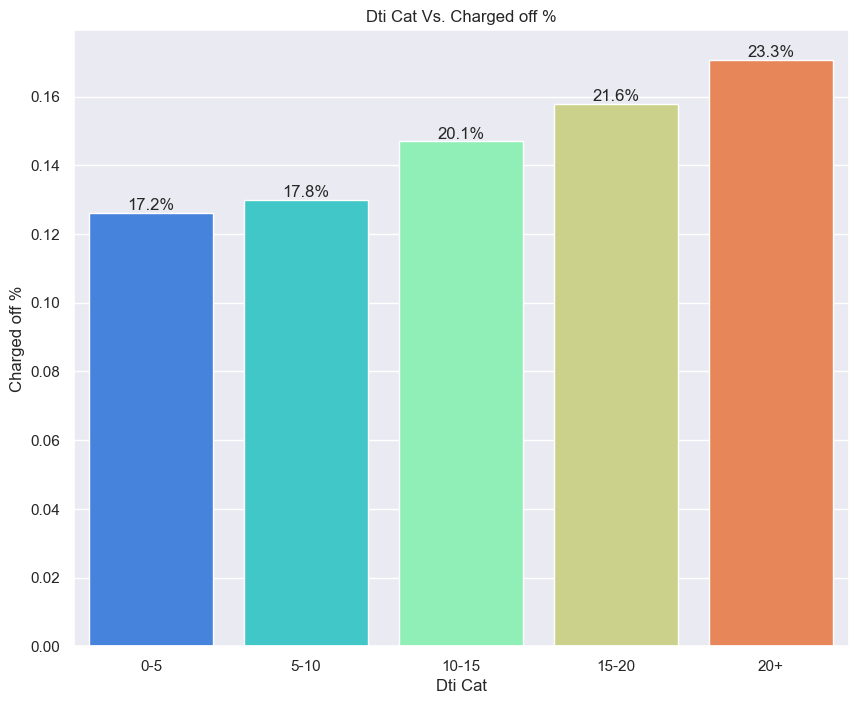

In [61]:
createBivariantePlot(loan_df_final, 'dti_cat')

#### Above stats states that when dept to income ratio is higher, chances of default is high

### 12. Public record Backrupt

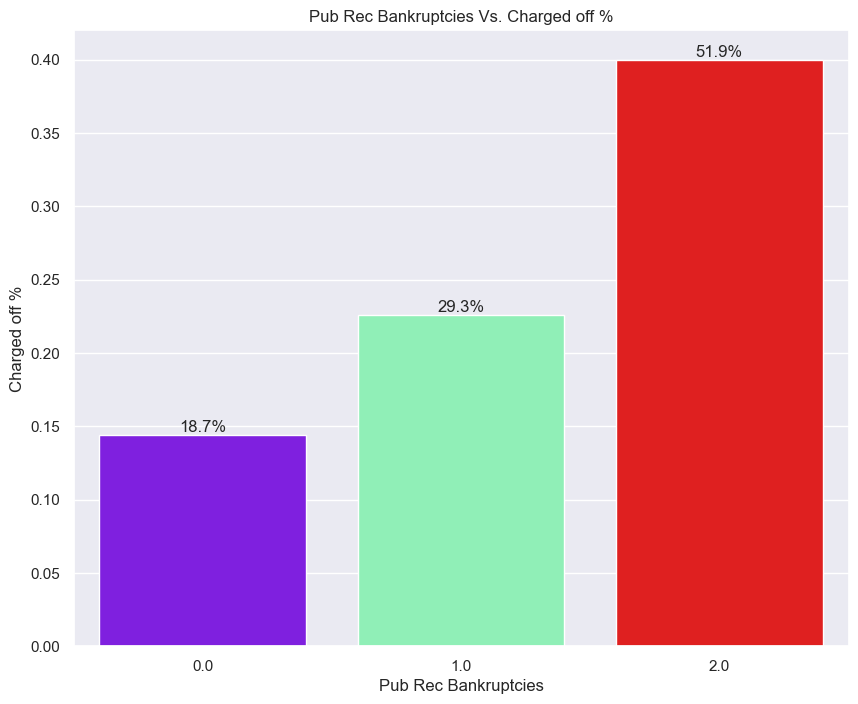

In [62]:
createBivariantePlot(loan_df_final, 'pub_rec_bankruptcies')

#### Above stats states that if a person is bankkrupt once there are high changes they will get defaulter again.

### 13. Issue Month

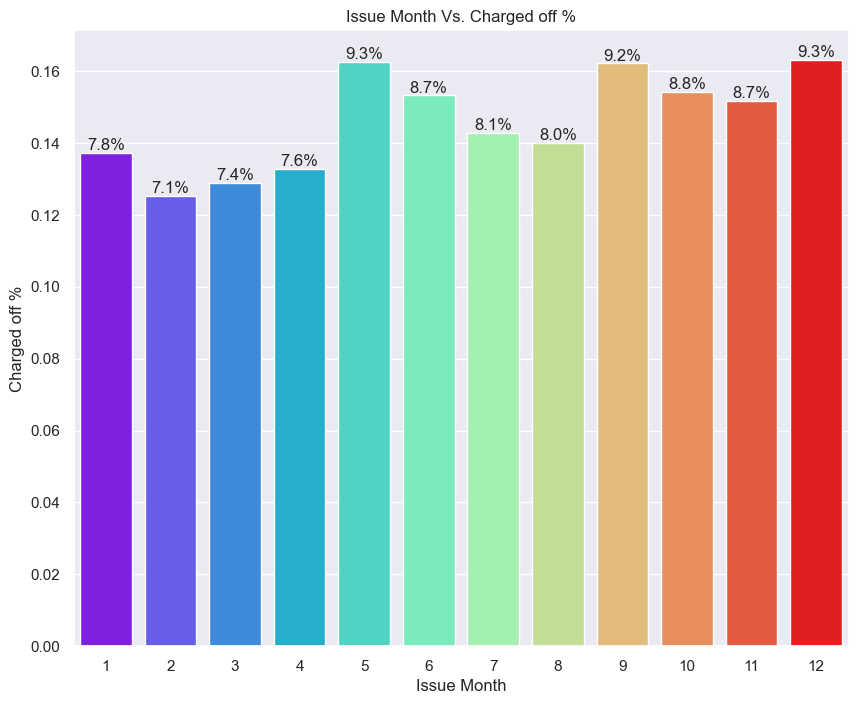

In [63]:
createBivariantePlot(loan_df_final, 'issue_month')

#### Above stats states that default cases are higher in these months-
#### Dec - could be due to holiday season people spend high
#### May - new summner session for college in US & not able to continue

## Conclusion

### Factor:

#### 1. Higher loan amount
#### 2. Term of loan
#### 3. Higher Interest rate
#### 4. Grade of applicant
#### 5. Applicant Home Ownership
#### 6. Applicant verification status
#### 7. Purpose of loan
#### 8. Location of Applicant
#### 9. Applicant public record of bankruptcy
#### 10. Loan issue month

### Recommendation:

#### 1. Recommendation is to keep the loan amount less than 24K USD unless the case is very strong
#### 2. 36 month tenure is recommended as per stats
#### 3. Focus more on higher grade applicants
#### 4. Priorities application who owns a house be it paid off or under mortgage.
#### 5. Verification of application should be done wisely as rate of defaulter is higher for verified accounts.
#### 6. NE,NV, ID states have high default rate, validate the process in those states
#### 7. Avoid giving loan to someone who defaulted even once
#### 8. Purpose of loan should be validate as small business loan with random justification are getting default
#### 9. Loan month is another important criteria as loans during holiday season or for college entrance could get risky.